#### Auto Insurance in Sweden

In the following data
X = number of claims
Y = total payment for all the claims in thousands of Swedish Kronor
for geographical zones in Sweden
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance

For dataset:<a href="https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr06.xls">Click here</a>

In [1]:
# importing pandas and numpy for reading dataset and do some analaysis
import pandas as pd
import numpy as np

In [2]:
# loading dataset using pandas
df = pd.read_excel(r'C:/Users/ansar/Downloads/slr06.xls')

# reading first five rows of the dataset
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
#Changing the names of columns
df.columns=['number of claims','total payment ']

In [4]:
#checking the changes done
df.head()

,number of claims,total payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [5]:
#checking the shape of data
df.shape

(63, 2)

The dataset contains 63 rows and 2 columns

In [6]:
#seeing the statistics
df.describe()

,number of claims,total payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [7]:
# assinging X and Y variable for splitting
X=df['number of claims'].values.reshape(-1, 1) #reshaping since model can be fitted only to 2D array
Y=df['total payment ']

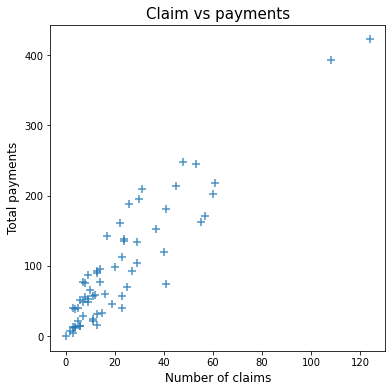

In [8]:
#visualizing the data
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X,Y,marker='+',alpha=0.8,s=50)
plt.xlabel('Number of claims',fontsize=12)
plt.ylabel('Total payments',fontsize=12)
plt.title('Claim vs payments',fontsize=15)
plt.show();

It is easily seen by the visulization that the X and Y variable has a linear relationship between them.

#### Splitting the dataset into train-test

In [9]:
# splitting data using train_test_split module of sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


#### Training the model

In [10]:
#loading linear regression from sklearn
from sklearn.linear_model import LinearRegression

#initialising the linear regression
model = LinearRegression()

In [11]:
# fitting the train data into model
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
#Checking the model prediction
model.predict([[19]])

array([86.98894667])

In [13]:
#checking the accuracy score
model.score(X_test,Y_test)

0.8353803474247439

So our model is showing 83% accuracy which is good.

In [14]:
# printing coefficient and intercept
print('Coefficient:',model.coef_)
print('Intercept:',model.intercept_)

Coefficient: [3.40488745]
Intercept: 22.296085203742095


In [15]:
# checking prediction on train and test
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

print(y_pred_train)
print(y_pred_test)

[ 35.91563499 124.44270857  49.53518477 444.50212844  66.559622
 229.99421938  39.32052243 121.03782112 100.60849645  97.203609
 127.84759601  42.72540988  49.53518477  66.559622   114.22804623
  39.32052243  80.17917178 107.41827134  52.94007221 100.60849645
  52.94007221  42.72540988  22.2960852   32.51074754  32.51074754
 158.49158302  46.13029732  35.91563499  46.13029732 104.0133839
  59.7498471   32.51074754 110.82315879  42.72540988  46.13029732
 100.60849645 161.89647047  69.96450944  69.96450944  86.98894667
 104.0133839  390.02392932  29.10586009 216.3746696  185.73068259
  56.34495966 175.51602025  59.7498471  148.27692069  63.15473455]
[121.03782112  76.77428433  66.559622    90.39383411 202.75511981
  66.559622    52.94007221 161.89647047 226.58933193 209.56489471
  35.91563499  73.36939689  59.7498471 ]


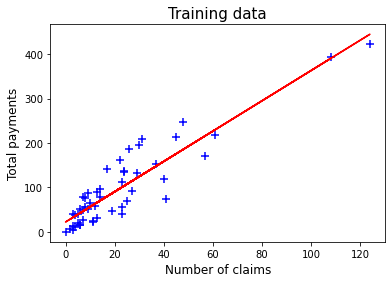

In [16]:
# visualizing the training data
plt.scatter(X_train,Y_train,marker='+',s=50,color='blue')
plt.plot(X_train,y_pred_train,color='red')
plt.xlabel('Number of claims',fontsize=12)
plt.ylabel('Total payments',fontsize=12)
plt.title('Training data',fontsize=15)
plt.show();

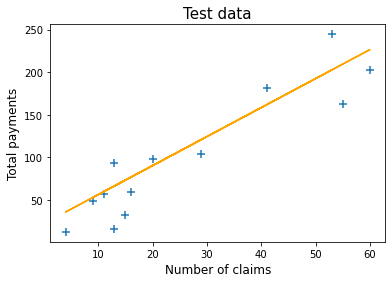

In [17]:
# visualizing the training data
plt.scatter(X_test,Y_test,marker='+',s=50)
plt.plot(X_test,y_pred_test,color='orange')
plt.xlabel('Number of claims',fontsize=12)
plt.ylabel('Total payments',fontsize=12)
plt.title('Test data',fontsize=15)
plt.show();